## Author: Aniket Malunjkar


### Data Science and Business Analytics Intern (TSF GRIP)


## Task-1 : Prediction Using Supervised ML


#### Predict the percentage of the student based on the number of study hours.


In [2]:
#importing the liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Step-1: Reading Dataset

In [3]:
url="http://bit.ly/w-data"
dataset=pd.read_csv(url)
print("Data read successfully")
dataset

Data read successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Getting the first 10 elemrnt

In [7]:
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Summary of the given dataset

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Step-2 : Data Visualization

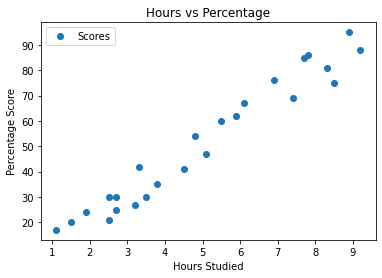

In [17]:
dataset.plot(x='Hours' , y='Scores' ,style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

## Step-3 : Training of Model 

In [29]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

## Training Part

In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training Complete")

Training Complete


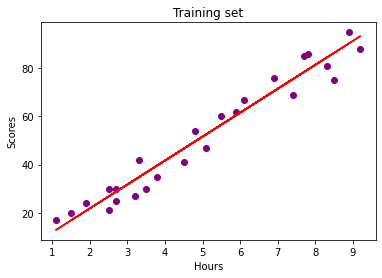

In [54]:
#Plotting the regression line
line=regressor.coef_*X+regressor.intercept_

#Plotting for the test data
plt.scatter(X, y, color="purple")
plt.plot(X, line,color="red")
plt.title("Training set")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

## Step-5 : Prediction and Comparing

In [73]:
print(X_test)
y_pred= regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


### Actual vs Predicted

In [74]:
df=pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [75]:
print('Traning Score:', regressor.score(X_train,y_train))
print('Test Score:', regressor.score(X_test, y_test))

Traning Score: 0.9484997422695115
Test Score: 0.9568211104435257


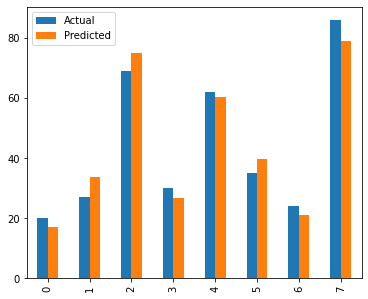

In [82]:
df.plot(kind='bar', figsize=(6,5))
plt.show()

In [83]:
Hours=9.25
test=np.array([Hours])
test=test.reshape(-1,1)
own_pred=regressor.predict(test)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


# # Step-6 : Evaluation

In [89]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
Root Mean Squared Error: 4.792191274636315
R-2: 0.9568211104435257
